# Assessment Week 4

## Pat Xua Tan 21018836

In the following section, we will explore two method of solving the two body problem. First section, we will uses euler method to solve for the path of a mass moving around a much more massive mass and assuming it to be a central force problem (treating the more massive mass to be a stationary force source). Second section, we will uses velocity Verlet method to solve for the path of two mass (the ratio of the lighter and heavier mass not exceeding 1:10) by setting an initial condition for a simpler simulation.

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def force(r1,r2,m1,m2):
    """Function purpose
    
    Inputs:
    r1 - position of mass 1
    r2 - position of mass 2
    m1 - mass 1
    m2 - mass 2
    # G is defined outside of this function
    
    Returns:
    Force - force experienced by mass 1
    
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    mag_r12 = np.linalg.norm(r2-r1) # np.linalg.norm helps to find the magnitude of a vector
    f_on_m1 = G*m1*m2*r12/(mag_r12**3)
    return f_on_m1

## Euler Method: Central Force Problem (Two body)

Using Euler method to propagate the path of a lighter mass around a much heavier mass. Euler method basically uses a truncated taylor series to obtain the next point (given a set of initial condition and equations) and iteratively extrapolating the next point.

In [16]:
# Set up parameters
Ndim = 2     #2D problem for now
dt = 0.01
Nsteps = 5000
G = 1       # Appropriate units
m1 = 0.0001 # Small
m2 = 1     # Large
r1 = np.zeros(( Nsteps ,Ndim  ))
r2 = np.zeros(( Nsteps ,Ndim  ))
v1 = np.zeros(( Nsteps ,Ndim  ))
v2 = np.zeros(( Nsteps ,Ndim  ))
# Set up storage for energies
#Energies are scalar quantity so Ndim shouldn't be included
KE = np.zeros((Nsteps))
PE = np.zeros((Nsteps))
L = np.zeros((Nsteps))
# Initial conditions
'''Using the fact that in a circular orbit the gravitational force must equal to centripetal force, 
we can solve for v1=sqrt(G*M) given r=1, M=1 , G=1 giving v1 = 1.
If we let the intial position of mass 1 be (x,y)=(0,1) as radius is one, due to the velocity being 
perpendicular to the circumference we must have only horizontal velocity component but no vertical 
velocity component v1 = (1,0) assuming mass 1 is traversing around mass 2 counter-clockwise
'''
r1[0] = np.array(( 0,1 ))
v1[0] = np.array(( 1,0 ))

In [17]:
for i in range(Nsteps-1):
    # Mass 2 is stationary at the origin
    r2_origin = np.array([0,0])
    # v1 at next step = v1 at this step + dt * dv/dt where dv/dt = F/m1
    v1[i+1]=v1[i] + dt*force(r1[i],r2_origin,m1,m2)/m1
    # r1 at next step = r1 at this step + dt * dr/dt where dr/dt = v
    r1[i+1]= r1[i] +dt*v1[i]
    
    # Calculate energies if calculating them during loop
    # KE for this stationary model, only mass 1 contribute to KE
    #creating an array to store velocity magnitude (speed)
    
    KE[i+1] = 0.5* (m1 *np.linalg.norm(v1[i])**2) # v[i] needs to be converted to magnitude of v[i]
    
    # U = -Gm1m2/r12 for PE
    #creating an array to store r12
    r12 = np.zeros(( Nsteps))
    r12[i] = np.linalg.norm(r2_origin -r1[i]) #calculating the magnitude of r2 -r1
    PE[i+1] = -G * m1 *m2 /r12[i]

    # Angular momentum
    L[i+1] = m1 * r12[i]* np.linalg.norm(v1[i])**2

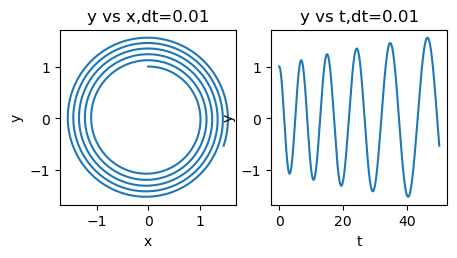

In [18]:
# Plot orbit either x vs y or x and y vs t
fig=plt.figure(figsize=(5,5))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

# x vs y plot 
ax1.set_title('y vs x,dt=0.01')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.plot(r1[:,0],r1[:,1])


t=np.linspace(0,Nsteps*dt,Nsteps)
ax2.set_title('y vs t,dt=0.01')
ax2.set_xlabel('t')
ax2.set_ylabel('y')
ax2.plot(t,r1[:,1])


Text(0, 0.5, 'Energy = PE + KE')

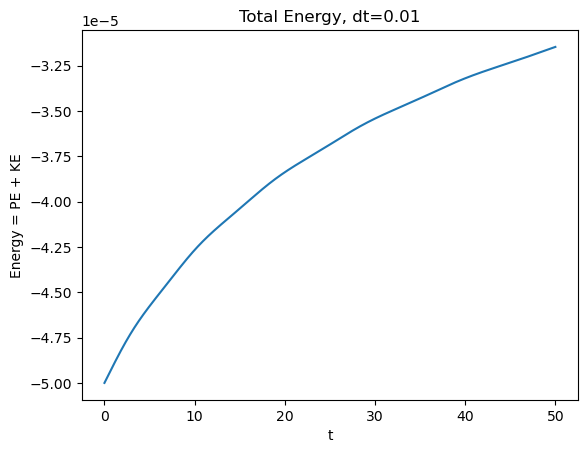

In [19]:
#Total energy vs t
total_E = PE + KE

plt.plot(t[1:],total_E[1:])
plt.title('Total Energy, dt=0.01')
plt.xlabel('t')
plt.ylabel('Energy = PE + KE')

### Energy Description
The total Energy does not conserve as can be seem from the x vs y graph, the path of mass 1 seems to be spiralling into mass 2.

Text(0, 0.5, 'L - Angular momentum')

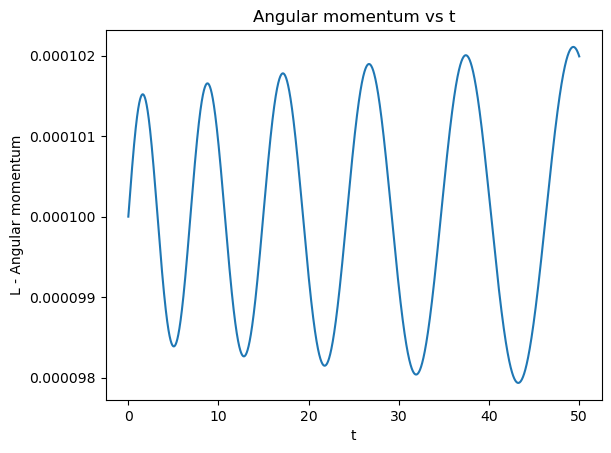

In [20]:
# Plot angular momentum vs t
plt.plot(t[1:],L[1:])
plt.title('Angular momentum vs t')
plt.xlabel('t')
plt.ylabel('L - Angular momentum')

### Total angular momentum desctiption
The total angular momentum seems to be increases as time goes on which is bad as it means the propagated path will not obey the conservation law.

### Effect of the size of dt
The dt play an important role in the accuracy of the propagated path plot. As you decrease dt, the fluctuation in total energy and angular momentum decreases which becomes increasing realistic as a physical system as the conservation laws are obeyed. But the cost of decreasing dt is a heavier computational power, more steps is required to propagate the same distance when comparing to a higher dt. 

## More reliable: velocity Verlet

Some introduction to the velocity Verlet method

You will need to make the problem more realistic, with the orbit centred around the centre of mass of the two bodies (see briefing notes), and two masses that are closer than in the previous section.

Give some explanation of how you found the initial positions and velocities.

In [21]:
# Set up number of steps, masses, timestep again (use new variable names)
Ndim = 2     #2D problem for now
dt = 0.01
N = 5000
G = 1       # Appropriate units
m1_v =0.5 # Small
m2_v = 1 # Large

# Storage for positions, velocities etc (again, use new names)
r1_v = np.zeros(( N ,Ndim  ))
r2_v = np.zeros(( N ,Ndim  ))
v1_v = np.zeros(( N ,Ndim  ))
v2_v = np.zeros(( N ,Ndim  ))

#Storage for KE, PE , Angular momentum L
KE_v= np.zeros(N )
PE_v= np.zeros(N)
L_v= np.zeros(N)

# Initial conditions
'''By setting the centre of mass at the origin and aligning the two body along the x-axis (x1+x2=1), we 
can obtain x1= m2/(m2+m1) and x2 = m1/(m1+m2). Using the fact that centripetal force equal to gravitational 
force, we can obtain veloity magnitude v1 = sqrt( G m2 ^2/(m2+m1)) and v2 = sqrt( G m1 ^2/(m2+m1))
which is valid as m2 >m1. The sign of v1 and v2 gives two different possible paths '''
x1_i= m2_v/(m2_v+m1_v)
x2_i= m1_v/(m1_v+m2_v)
v1_i= np.sqrt(abs(m2_v**2/(m1_v+m2_v)))
v2_i= np.sqrt(abs(m1_v**2/(m1_v+m2_v)))

'''At the initial position both body only have vertical velocity component as velocity must be tangential to the
point of path'''
r1_v[0]=np.array([-x1_i,0])
r2_v[0]=np.array([x2_i,0])
v1_v[0]=np.array([0,-v1_i])
v2_v[0]=np.array([0,v2_i])

In [22]:
def force(r1,r2,m1,m2):
    """Function purpose
    
    Inputs:
    r1 - position of mass 1
    r2 - position of mass 2
    m1 - mass 1
    m2 - mass 2
    # G is defined outside of this function
    
    Returns:
    Force - force experienced by mass 1
    
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    mag_r12 = np.linalg.norm(r2-r1) # np.linalg.norm helps to find the magnitude of a vector
    f_on_m1 = G*m1*m2*r12/(mag_r12**3)
    return f_on_m1

In [23]:
for i in range(N-1):
    
    #updating position using velocity Verlet
    r1_v[i+1]=r1_v[i] + (dt*v1_v[i]) + (dt**2) *(force(r1_v[i],r2_v[i],m1_v,m2_v)/(2*m1_v))
    r2_v[i+1]=r2_v[i] + (dt*v2_v[i]) + (dt**2) *(force(r2_v[i],r1_v[i],m2_v,m1_v)/(2*m2_v))
    
    #updating velocity using velocity Verlet
    v1_v[i+1]=v1_v[i] + dt*( (force(r1_v[i],r2_v[i],m1_v,m2_v) + force(r1_v[i+1],r2_v[i+1],m1_v,m2_v))/(2*m1_v))
    v2_v[i+1]=v2_v[i] + dt*( (force(r2_v[i],r1_v[i],m2_v,m1_v) + force(r2_v[i+1],r1_v[i+1],m2_v,m1_v))/(2*m2_v))
    
    #Updating KE
    KE_v[i+1]= 0.5 * (m1_v*np.linalg.norm(v1_v[i])**2) + 0.5 * (m2_v*np.linalg.norm(v2_v[i])**2)
    

    
    # U = -Gm1m2/r12 for PE
    #creating an array to store r12
    r12_v = np.zeros(N)
    r12_v[i] = np.linalg.norm(r2_v[i] - r1_v[i]) #calculating the magnitude of r2 -r1
    PE_v[i+1] = -G * m1_v *m2_v /r12_v[i]

    #Total energy
    Total_E_v=KE_v+ PE_v
    
    # Angular momentum
    L_v[i+1] = m1_v * r12_v[i]* np.linalg.norm(v1_v[i])**2 + m2_v *r12_v[i]*np.linalg.norm(v2_v[i])**2
    
    


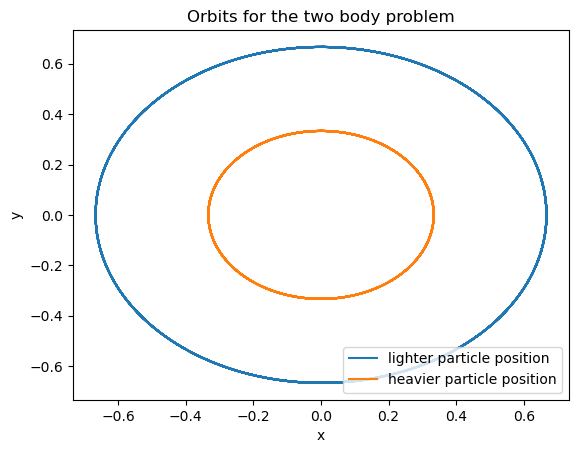

In [24]:
#Plotting the particle's paths and velocity 
plt.plot(r1_v[:,0],r1_v[:,1],label='lighter particle position')
plt.plot(r2_v[:,0],r2_v[:,1],label='heavier particle position')
plt.title('Orbits for the two body problem')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

Text(0, 0.5, 'Energy ')

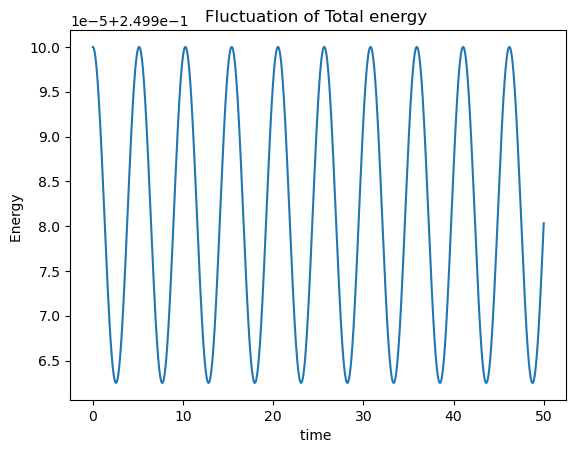

In [25]:
%matplotlib inline
time_v= np.linspace(0,N*dt,N-1)
plt.plot(time_v,KE_v[1:])
plt.title('Fluctuation of Total energy ')
plt.xlabel('time ') 
plt.ylabel('Energy ') #didnt put unit as G is assumed to be 1

Text(0, 0.5, 'Total angular momentum ')

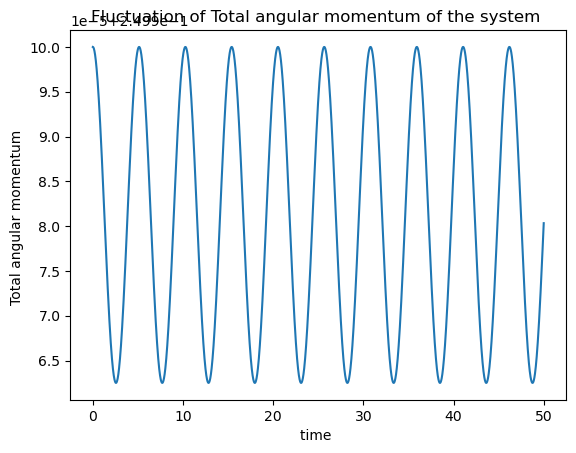

In [26]:
%matplotlib inline
plt.plot(time_v,KE_v[1:])
plt.title('Fluctuation of Total angular momentum of the system ')
plt.xlabel('time ') 
plt.ylabel('Total angular momentum ') #didnt put unit as G is assumed to be 1

### Conclusion
The orbits agrees with the theory as the heavier particle will be closer to the centre of mass which is as shown in the plot. The fluctuation of total energy and angular momentum is in the order of -5 which proofs that this velocity Verlet method is very effective at propagating the physical system forward in time. For the total angular momentum, the fluctuation does not seems to be increasing with time which is better than the Euler method as the fluctuation of total angular momentum does increases with time. Velocity Verlet is a better method compare to Euler method because the conservation law is minimised even as time increases.